In [4]:
# Import the necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from importlib import reload
import os
import time

# Import the MFI library 
import MFI_lib2D as lib2
import MFI_class2D

# Set the path to the notebook and the data folder (and figures folder if needed)
if 'path_notebook' not in globals(): path_notebook = os.getcwd()
print("The path to the notebook is:", path_notebook)

path_inve = path_notebook + "/_data_convergence_analysis/Invernizzi_Potential/"
path_pot1 = path_notebook + "/_data_convergence_analysis/pot1/"
path_pot2 = path_notebook + "/_data_convergence_analysis/pot2/"
path_pot3 = path_notebook + "/_data_convergence_analysis/pot3/"

# Set the plotting parameters
for _plt_parameters_ in [0]:
    from matplotlib import rc
    plt.rcParams.update({ "text.usetex": True, "font.family": "serif", "font.serif": ["Helvetica"], "font.size": 12, "axes.titleweight": "bold"})
    plw = 0.6  # width of (box line, tick line, ...)
    plt.rcParams.update({"axes.linewidth": plw, "figure.figsize": (4,3)}) 
    plt.rcParams.update({"xtick.top": True, "xtick.direction": "in", "xtick.major.width": plw, "xtick.minor.width": plw, "xtick.minor.visible": True, "xtick.major.size": 5})
    plt.rcParams.update({"ytick.right": True, "ytick.direction": "in", "ytick.major.width": plw, "ytick.minor.width": plw, "ytick.minor.visible": True, "ytick.major.size": 5})


The path to the notebook is: /home/ucecabj/Desktop/MFI_git/MFI_class2D


### Define Potential and default parameters

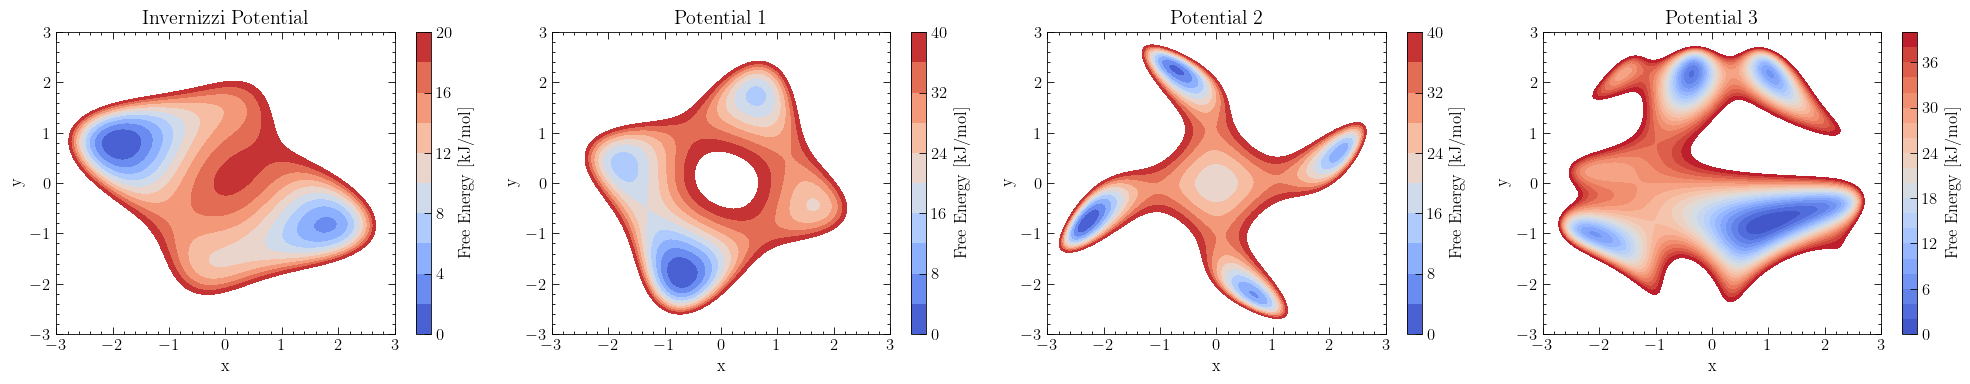

In [8]:
# Define the grid, the potentials and the cutoffs
grid = np.linspace(-3, 3, 100); 
X, Y = np.meshgrid(grid, grid)

inve_pot = 1.34549*X**4+1.90211*X**3*Y+3.92705*X**2*Y**2-6.44246*X**2-1.90211*X*Y**3+5.58721*X*Y+1.33481*X+1.34549*Y**4-5.55754*Y**2+0.904586*Y+18.5598
inve_pot = inve_pot - np.min(inve_pot)

ab_pot1 = 3.9*X**4 + 3.9*Y**4 - 19.2*X**2 - 19.2*Y**2 + 5.7*X**3*Y - 5.7*X*Y**3 + 12*X**2*Y**2 - 6*X*Y + 2.7*Y + 3.6*X
ab_pot1 = ab_pot1 - np.min(ab_pot1)

ab_pot2 = 1.84*X**6 + 1.84*Y**6 - 11.5*X**4 - 11.5*Y**4 + 17.94*Y**2 + 17.94*X**2 - 2.3*X**5*Y + 2.3*X*Y**5 - 3.7*X**3*Y + 3.7*X*Y**3 + 20*X**2*Y**2 + 2.1*X**2 + 2.1*Y**2 + X**2*Y + X*Y**2 + 24.70075155
ab_pot2 = ab_pot2 - np.min(ab_pot2)

ab_pot3 = np.exp(X-2)**5 + np.exp(-X-2)**5 + np.exp(Y-2)**5 + np.exp(-Y-2)**5 + 13*np.sin(2*X*Y) + 17*np.sin(2*Y) + 0.137*X**4*Y**4
ab_pot3 = ab_pot3 - np.min(ab_pot3)

FES_cutoff_list = [20, 40, 40, 40]

# plot the free energy surface
plt.figure(figsize=(20, 4))
plt.subplot(1,4,1); plt.contourf(X, Y, inve_pot, levels=np.linspace(0, FES_cutoff_list[0], 11), cmap='coolwarm'); plt.colorbar(label="Free Energy [kJ/mol]"); plt.xlabel("x"); plt.ylabel("y"); plt.title("Invernizzi Potential"); 
plt.subplot(1,4,2); plt.contourf(X, Y, ab_pot1, levels=np.linspace(0, FES_cutoff_list[1], 11), cmap='coolwarm'); plt.colorbar(label="Free Energy [kJ/mol]"); plt.xlabel("x"); plt.ylabel("y"); plt.title("Potential 1")
plt.subplot(1,4,3); plt.contourf(X, Y, ab_pot2, levels=np.linspace(0, FES_cutoff_list[2], 11), cmap='coolwarm'); plt.colorbar(label="Free Energy [kJ/mol]"); plt.xlabel("x"); plt.ylabel("y"); plt.title("Potential 2")
plt.subplot(1,4,4); plt.contourf(X, Y, ab_pot3, levels=np.linspace(0, FES_cutoff_list[3], 21), cmap='coolwarm'); plt.colorbar(label="Free Energy [kJ/mol]"); plt.xlabel("x"); plt.ylabel("y"); plt.title("Potential 3")
plt.tight_layout(); plt.show()


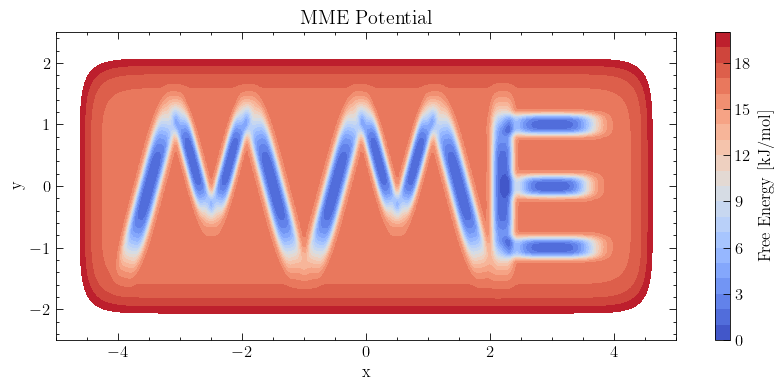

In [11]:
### MME potential

gridxx = np.linspace(-5, 5, 300); 
gridyy = np.linspace(-2.5, 2.5, 100)
XX, YY = np.meshgrid(gridxx, gridyy)

def rot_gaus(x=XX, y=YY, x0=0, y0=0, xs=0.5, ys=0.5, A=1, theta=0, exp=2):
    theta = np.deg2rad(theta)
    X_rot = (XX - x0) * np.cos(theta) + (YY - y0) * np.sin(theta)
    Y_rot = -(XX - x0) * np.sin(theta) + (YY - y0) * np.cos(theta)
    return - A * np.exp(-0.5 * ((X_rot / xs) ** exp + (Y_rot / ys) ** exp))

mme_pot = 2E-13*XX**20 + 0.05*YY**6

mme_pot += rot_gaus(A=15, x0=-3.5  , y0=0  , xs=0.15 , ys=1  , theta=-15, exp=4)
mme_pot += rot_gaus(A=15, x0=-2.8, y0=0.4, xs=0.12 , ys=0.7, theta=15 , exp=4)
mme_pot += rot_gaus(A=15, x0=-2.2 , y0=0.4, xs=0.12 , ys=0.7, theta=-15, exp=4)
mme_pot += rot_gaus(A=15, x0=-1.5   , y0=0  , xs=0.15 , ys=1  , theta=15 , exp=4)

mme_pot += rot_gaus(A=15, x0=-0.5  , y0=0  , xs=0.15 , ys=1  , theta=-15, exp=4)
mme_pot += rot_gaus(A=15, x0=0.2, y0=0.4, xs=0.12 , ys=0.7, theta=15 , exp=4)
mme_pot += rot_gaus(A=15, x0=0.8 , y0=0.4, xs=0.12 , ys=0.7, theta=-15, exp=4)
mme_pot += rot_gaus(A=15, x0=1.5   , y0=0  , xs=0.15 , ys=1  , theta=15 , exp=4)

mme_pot += rot_gaus(A=15, x0=2.2 , y0=0  , xs=0.15 , ys=1  , theta=0 , exp=4)
mme_pot += rot_gaus(A=15, x0=3   , y0=0  , xs=0.5 , ys=0.15  , theta=0 , exp=4)
mme_pot += rot_gaus(A=15, x0=3   , y0=1  , xs=0.6 , ys=0.15  , theta=0 , exp=4)
mme_pot += rot_gaus(A=15, x0=3   , y0=-1 , xs=0.6 , ys=0.15  , theta=0 , exp=4)

mme_pot = mme_pot - np.min(mme_pot)

plt.figure(figsize=(10, 4))
plt.contourf(XX, YY, mme_pot, levels=np.linspace(0, 20, 21), cmap='coolwarm'); plt.colorbar(label="Free Energy [kJ/mol]"); plt.xlabel("x"); plt.ylabel("y"); plt.title("MME Potential"); plt.show()


### Compare Convergence of Simulations

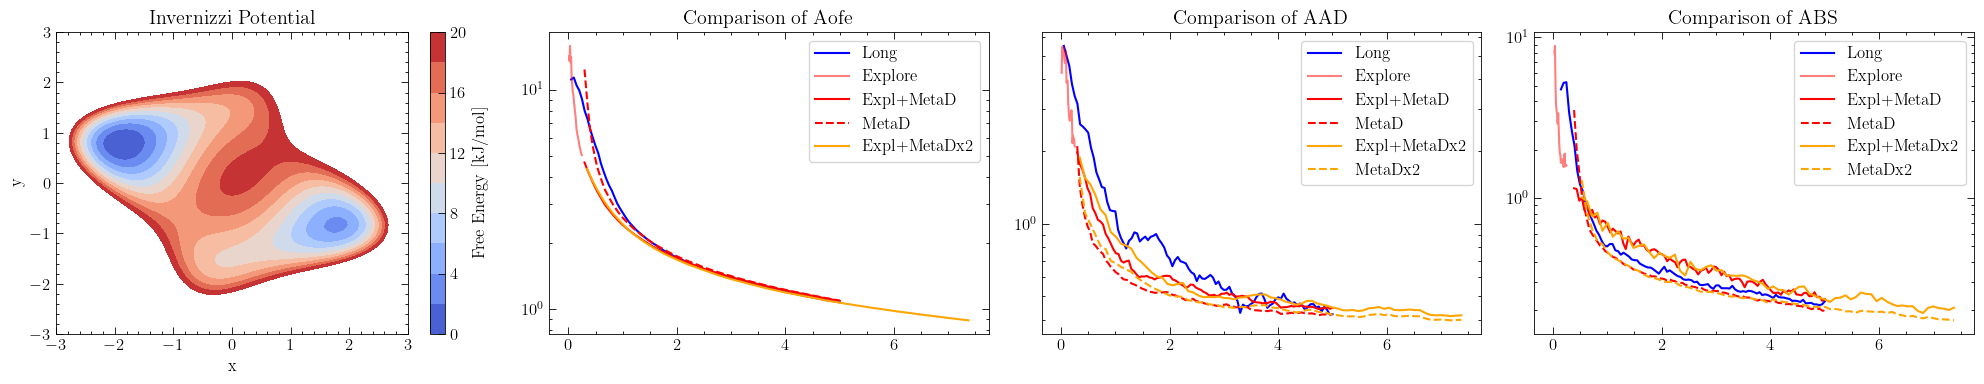

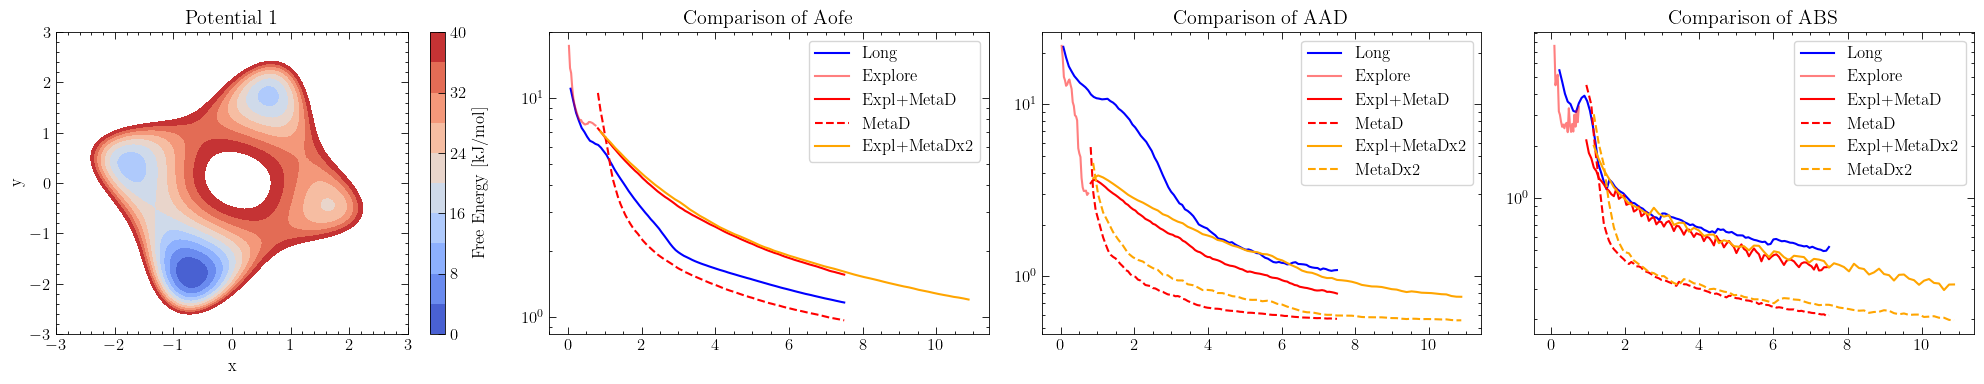

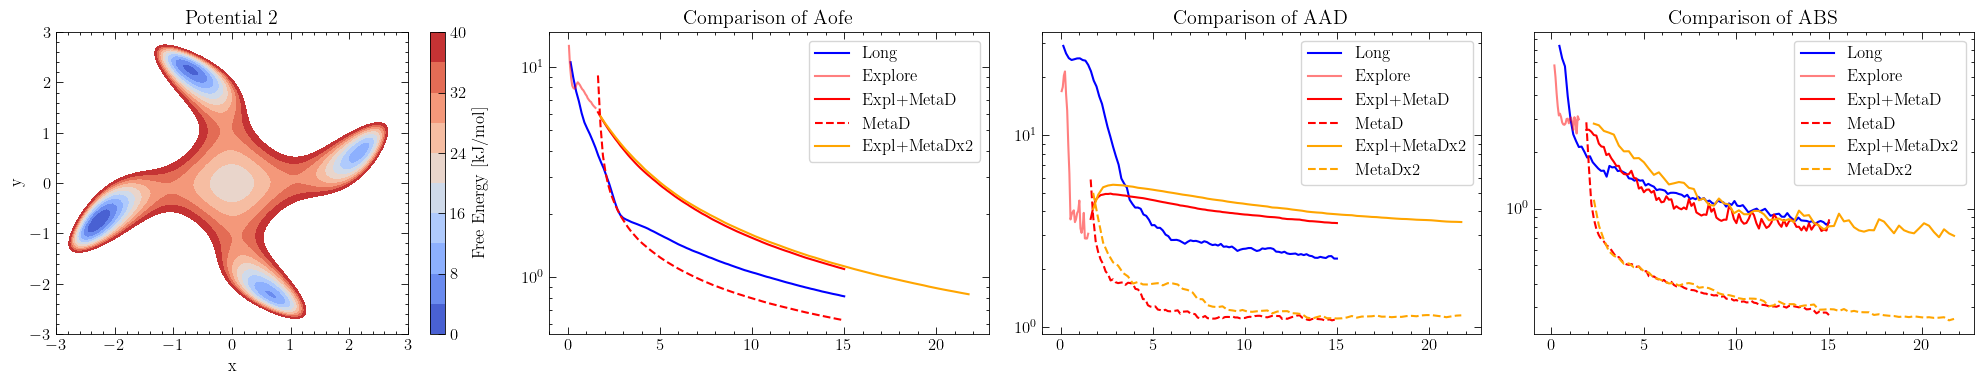

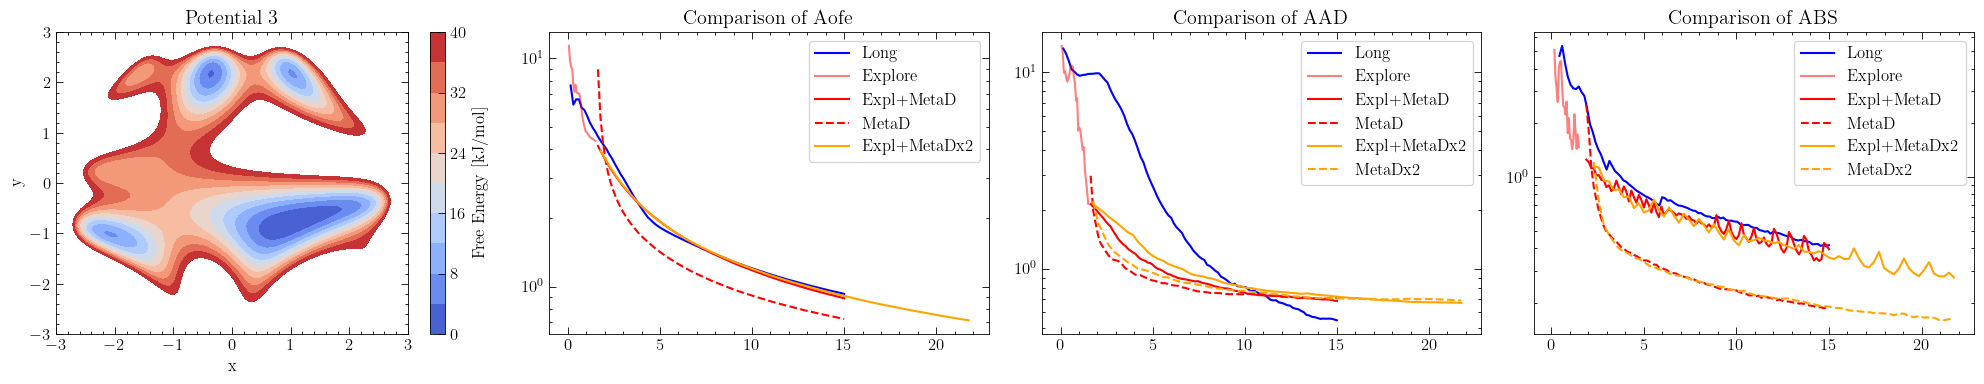

In [16]:
pot_list = [inve_pot, ab_pot1, ab_pot2, ab_pot3]
path_data_list = [path_inve, path_pot1, path_pot2, path_pot3]
title_list = ["Invernizzi Potential", "Potential 1", "Potential 2", "Potential 3"]
expl_sim_index_list = [88, 74, 44, 1]
n_sim_long_list = [20, 100, 20, 100]


for n_surf in range(4):
    
    path_data = path_data_list[n_surf]
    
    ### laod results

    # long simulation
    t_collection, aofe_collection, aad_collection, abs_collection = [], [], [], []
    for i_sim in range(1,n_sim_long_list[n_surf]+1):
        t, _, aofe, aad, aBS = lib2.load_pkl(path_data + f"error_progression_long_{i_sim}.pkl")
        t_collection.append(t); aofe_collection.append(aofe); aad_collection.append(aad); abs_collection.append(aBS)
    avr_results = lib2.get_mean_ste_of_n_error_prog(time=t_collection[0], error_collection=aofe_collection, error_collection_2=aad_collection, error_collection_3=abs_collection, return_results=True, plot=False, plot_log=False)
    time_long, mean_ofe_long, ste_ofe_long, mean_aad_long, ste_aad_long, mean_abs_long, ste_abs_long = avr_results
    plt.close()

    # exploration simulation
    t_expl, _, aofe_expl, aad_expl, abs_expl = lib2.load_pkl(path_data + f"MFI_results_expl_{expl_sim_index_list[n_surf]}.pkl")[1][1].T

    # metad simulation
    t_collection, aofe_collection, aad_collection, abs_collection = [], [], [], []
    for i_sim in range(1,101):
        t, _, aofe, aad, aBS = lib2.load_pkl(path_data + f"error_progression_metad_{i_sim}.pkl")
        t_collection.append(t); aofe_collection.append(aofe); aad_collection.append(aad); abs_collection.append(aBS)
    avr_results = lib2.get_mean_ste_of_n_error_prog(time=t_collection[0], error_collection=aofe_collection, error_collection_2=aad_collection, error_collection_3=abs_collection, return_results=True, plot=False, plot_log=False)
    time_metad, mean_ofe_metad, ste_ofe_metad, mean_aad_metad, ste_aad_metad, mean_abs_metad, ste_abs_metad = avr_results
    plt.close()

    # metad ALTERNATIVE simulation
    t_collection, aofe_collection, aad_collection, abs_collection = [], [], [], []
    for i_sim in range(1,101):
        t, _, aofe, aad, aBS = lib2.load_pkl(path_data + f"error_progression_metadALT_{i_sim}.pkl")
        t_collection.append(t); aofe_collection.append(aofe); aad_collection.append(aad); abs_collection.append(aBS)
    avr_results = lib2.get_mean_ste_of_n_error_prog(time=t_collection[0], error_collection=aofe_collection, error_collection_2=aad_collection, error_collection_3=abs_collection, return_results=True, plot=False, plot_log=False)
    time_metadALT, mean_ofe_metadALT, ste_ofe_metadALT, mean_aad_metadALT, ste_aad_metadALT, mean_abs_metadALT, ste_abs_metadALT = avr_results
    plt.close()

    # metadx2 simulation
    t_collection, aofe_collection, aad_collection, abs_collection = [], [], [], []
    for i_sim in range(1,51):
        t, _, aofe, aad, aBS = lib2.load_pkl(path_data + f"error_progression_metadx2_{i_sim}.pkl")
        t_collection.append(t); aofe_collection.append(aofe); aad_collection.append(aad); abs_collection.append(aBS)
    avr_results = lib2.get_mean_ste_of_n_error_prog(time=t_collection[0], error_collection=aofe_collection, error_collection_2=aad_collection, error_collection_3=abs_collection, return_results=True, plot=False, plot_log=False)
    time_metadx2, mean_ofe_metadx2, ste_ofe_metadx2, mean_aad_metadx2, ste_aad_metadx2, mean_abs_metadx2, ste_abs_metadx2 = avr_results
    plt.close()

    # metadx2 ALTERNATIVE simulation
    t_collection, aofe_collection, aad_collection, abs_collection = [], [], [], []
    for i_sim in range(1,51):
        t, _, aofe, aad, aBS = lib2.load_pkl(path_data + f"error_progression_metadx2ALT_{i_sim}.pkl")
        t_collection.append(t); aofe_collection.append(aofe); aad_collection.append(aad); abs_collection.append(aBS)
    avr_results = lib2.get_mean_ste_of_n_error_prog(time=t_collection[0], error_collection=aofe_collection, error_collection_2=aad_collection, error_collection_3=abs_collection, return_results=True, plot=False, plot_log=False)
    time_metadx2ALT, mean_ofe_metadx2ALT, ste_ofe_metadx2ALT, mean_aad_metadx2ALT, ste_aad_metadx2ALT, mean_abs_metadx2ALT, ste_abs_metadx2ALT = avr_results
    plt.close()
    


    plt.figure(figsize=(20,4))
    # time_metad, mean_ofe_metad, ste_ofe_metad, mean_aad_metad, ste_aad_metad
    
    plt.subplot(1,4,1)
    plt.contourf(X, Y, pot_list[n_surf], levels=np.linspace(0, FES_cutoff_list[n_surf], 11), cmap='coolwarm'); plt.colorbar(label="Free Energy [kJ/mol]"); plt.xlabel("x"); plt.ylabel("y"); plt.title(title_list[n_surf]); 

    plt.subplot(1,4,2)
    plt.plot(time_long, mean_ofe_long, label="Long", color="blue")
    plt.plot(t_expl, aofe_expl, label="Explore", color="red", alpha=0.5)
    plt.plot(time_metad, mean_ofe_metad, label="Expl+MetaD", color="red")
    plt.plot(time_metadALT, mean_ofe_metadALT, label="MetaD", color="red", linestyle="--")
    plt.plot(time_metadx2, mean_ofe_metadx2, label="Expl+MetaDx2", color="orange")
    # plt.plot(time_metadx2, mean_ofe_metadx2ALT, label="MetaDx2", color="orange", linestyle="--")
    # plt.plot(time_metadx3, mean_ofe_metadx3, label="MetaDx3", color="green")
    # plt.plot(time_metadx4, mean_ofe_metadx4, label="MetaDx4", color="purple")
    # plt.plot(time_metadx6, mean_ofe_metadx6, label="MetaDx6", color="aquamarine")
    # plt.plot(time_metadx10, mean_ofe_metadx10, label="MetaDx6", color="grey")
    plt.legend(); plt.yscale("log"); plt.title("Comparison of Aofe")

    plt.subplot(1,4,3)
    plt.plot(time_long, mean_aad_long, label="Long", color="blue"); #plt.plot([t_long[-1],t1x4[-1]], [aad_long[-1],aad_long[-1]], color="blue", linestyle="--", alpha=0.3)
    plt.plot(t_expl, aad_expl, label="Explore", color="red", alpha=0.5)
    plt.plot(time_metad, mean_aad_metad, label="Expl+MetaD", color="red");#plt.plot([t1x1[-1],t1x4[-1]], [aad1x1[-1],aad1x1[-1]], color="red", linestyle="--", alpha=0.3)
    plt.plot(time_metadALT, mean_aad_metadALT, label="MetaD", color="red", linestyle="--");#plt.plot([t1x1[-1],t1x4[-1]], [aad1x1[-1],aad1x1[-1]], color="red", linestyle="--", alpha=0.3, linestyle="--")
    plt.plot(time_metadx2, mean_aad_metadx2, label="Expl+MetaDx2", color="orange")
    plt.plot(time_metadx2, mean_aad_metadx2ALT, label="MetaDx2", color="orange", linestyle="--")
    # plt.plot(time_metadx3, mean_aad_metadx3, label="MetaDx3", color="green")
    # plt.plot(time_metadx4, mean_aad_metadx4, label="MetaDx4", color="purple")
    # plt.plot(time_metadx6, mean_aad_metadx6, label="MetaDx6", color="aquamarine")
    # plt.plot(time_metadx10, mean_aad_metadx10, label="MetaDx6", color="grey")
    plt.legend(); plt.yscale("log"); plt.title("Comparison of AAD"); 
    # plt.ylim(0.38, 0.6); 
    # plt.xlim(0,10)

    plt.subplot(1,4,4)
    plt.plot(time_long, mean_abs_long, label="Long", color="blue"); #plt.plot([t_long[-1],t1x4[-1]], [aad_long[-1],aad_long[-1]], color="blue", linestyle="--", alpha=0.3)
    plt.plot(t_expl, abs_expl, label="Explore", color="red", alpha=0.5)
    plt.plot(time_metad, mean_abs_metad, label="Expl+MetaD", color="red");#plt.plot([t1x1[-1],t1x4[-1]], [aad1x1[-1],aad1x1[-1]], color="red", linestyle="--", alpha=0.3)
    plt.plot(time_metadALT, mean_abs_metadALT, label="MetaD", color="red", linestyle="--");#plt.plot([t1x1[-1],t1x4[-1]], [aad1x1[-1],aad1x1[-1]], color="red", linestyle="--", alpha=0.3, linestyle="--")
    plt.plot(time_metadx2, mean_abs_metadx2, label="Expl+MetaDx2", color="orange")
    plt.plot(time_metadx2, mean_abs_metadx2ALT, label="MetaDx2", color="orange", linestyle="--")
    # plt.plot(time_metadx3, mean_abs_metadx3, label="MetaDx3", color="green")
    # plt.plot(time_metadx4, mean_abs_metadx4, label="MetaDx4", color="purple")
    # plt.plot(time_metadx6, mean_abs_metadx6, label="MetaDx6", color="aquamarine")
    # plt.plot(time_metadx10, mean_abs_metadx10, label="MetaDx6", color="grey")
    plt.legend(); plt.yscale("log"); plt.title("Comparison of ABS"); 
    # plt.ylim(0.38, 0.6); 
    # plt.xlim(0,10)

    plt.tight_layout(); plt.show()

In [22]:
### laod final results
pot_list = [inve_pot, ab_pot1, ab_pot2, ab_pot3]
path_data_list = [path_inve, path_pot1, path_pot2, path_pot3]
title_list = ["PotInve", "Pot 1", "Pot 2", "Pot 3"]
expl_sim_index_list = [88, 74, 44, 1]
n_sim_long_list = [20, 100, 20, 100]

aofe_results, aad_results, abs_results = [], [], []


for n_surf in range(4):
    path_data = path_data_list[n_surf]
    

    # long simulation
    t_collection, aofe_collection, aad_collection, abs_collection = [], [], [], []
    for i_sim in range(1,n_sim_long_list[n_surf]+1):
        t, _, aofe, aad, aBS = lib2.load_pkl(path_data + f"error_progression_long_{i_sim}.pkl")
        t_collection.append(t); aofe_collection.append(aofe); aad_collection.append(aad); abs_collection.append(aBS)
    avr_results = lib2.get_mean_ste_of_n_error_prog(time=t_collection[0], error_collection=aofe_collection, error_collection_2=aad_collection, error_collection_3=abs_collection, return_results=True, plot=False, plot_log=False)
    time_long, mean_ofe_long, ste_ofe_long, mean_aad_long, ste_aad_long, mean_abs_long, ste_abs_long = avr_results
    aofe_results.append(mean_ofe_long[-1]); aad_results.append(mean_aad_long[-1]); abs_results.append(mean_abs_long[-1])
    plt.close()

for n_surf in range(4):
    path_data = path_data_list[n_surf]

    # metad simulation
    t_collection, aofe_collection, aad_collection, abs_collection = [], [], [], []
    for i_sim in range(1,101):
        t, _, aofe, aad, aBS = lib2.load_pkl(path_data + f"error_progression_metad_{i_sim}.pkl")
        t_collection.append(t); aofe_collection.append(aofe); aad_collection.append(aad); abs_collection.append(aBS)
    avr_results = lib2.get_mean_ste_of_n_error_prog(time=t_collection[0], error_collection=aofe_collection, error_collection_2=aad_collection, error_collection_3=abs_collection, return_results=True, plot=False, plot_log=False)
    time_metad, mean_ofe_metad, ste_ofe_metad, mean_aad_metad, ste_aad_metad, mean_abs_metad, ste_abs_metad = avr_results
    aofe_results.append(mean_ofe_metad[-1]); aad_results.append(mean_aad_metad[-1]); abs_results.append(mean_abs_metad[-1])
    plt.close()

for n_surf in range(4):
    path_data = path_data_list[n_surf]

    # metadx2 simulation
    t_collection, aofe_collection, aad_collection, abs_collection = [], [], [], []
    for i_sim in range(1,51):
        t, _, aofe, aad, aBS = lib2.load_pkl(path_data + f"error_progression_metadx2_{i_sim}.pkl")
        t_collection.append(t); aofe_collection.append(aofe); aad_collection.append(aad); abs_collection.append(aBS)
    avr_results = lib2.get_mean_ste_of_n_error_prog(time=t_collection[0], error_collection=aofe_collection, error_collection_2=aad_collection, error_collection_3=abs_collection, return_results=True, plot=False, plot_log=False)
    time_metadx2, mean_ofe_metadx2, ste_ofe_metadx2, mean_aad_metadx2, ste_aad_metadx2, mean_abs_metadx2, ste_abs_metadx2 = avr_results
    aofe_results.append(mean_ofe_metadx2[-1]); aad_results.append(mean_aad_metadx2[-1]); abs_results.append(mean_abs_metadx2[-1])
    plt.close()   
     
for n_surf in range(4):
    path_data = path_data_list[n_surf]

    # metad ALTERNATIVE simulation
    t_collection, aofe_collection, aad_collection, abs_collection = [], [], [], []
    for i_sim in range(1,101):
        t, _, aofe, aad, aBS = lib2.load_pkl(path_data + f"error_progression_metadALT_{i_sim}.pkl")
        t_collection.append(t); aofe_collection.append(aofe); aad_collection.append(aad); abs_collection.append(aBS)
    avr_results = lib2.get_mean_ste_of_n_error_prog(time=t_collection[0], error_collection=aofe_collection, error_collection_2=aad_collection, error_collection_3=abs_collection, return_results=True, plot=False, plot_log=False)
    time_metadALT, mean_ofe_metadALT, ste_ofe_metadALT, mean_aad_metadALT, ste_aad_metadALT, mean_abs_metadALT, ste_abs_metadALT = avr_results
    aofe_results.append(mean_ofe_metadALT[-1]); aad_results.append(mean_aad_metadALT[-1]); abs_results.append(mean_abs_metadALT[-1])
    plt.close()


for n_surf in range(4):
    path_data = path_data_list[n_surf]

    # metadx2 ALTERNATIVE simulation
    t_collection, aofe_collection, aad_collection, abs_collection = [], [], [], []
    for i_sim in range(1,51):
        t, _, aofe, aad, aBS = lib2.load_pkl(path_data + f"error_progression_metadx2ALT_{i_sim}.pkl")
        t_collection.append(t); aofe_collection.append(aofe); aad_collection.append(aad); abs_collection.append(aBS)
    avr_results = lib2.get_mean_ste_of_n_error_prog(time=t_collection[0], error_collection=aofe_collection, error_collection_2=aad_collection, error_collection_3=abs_collection, return_results=True, plot=False, plot_log=False)
    time_metadx2ALT, mean_ofe_metadx2ALT, ste_ofe_metadx2ALT, mean_aad_metadx2ALT, ste_aad_metadx2ALT, mean_abs_metadx2ALT, ste_abs_metadx2ALT = avr_results
    aofe_results.append(mean_ofe_metadx2ALT[-1]); aad_results.append(mean_aad_metadx2ALT[-1]); abs_results.append(mean_abs_metadx2ALT[-1])
    plt.close()
    
    

In [18]:
### Define function to plot results on block-grid

def plot_results_grid(results, results_min=None, results_max=None, n_rows=None, n_cols=None, title=None, row_label=None, col_label=None, row_ticks=None, col_ticks=None, cmap='RdYlGn_r', fig_size_scaling=1, ax=None, plot_show=True):
    """
    Plots a grid where each cell shows one element from results.
    
    Parameters:
      - results: list of numeric values (or "NA") to plot.
      - n_rows, n_cols: grid dimensions (if not provided, and if labels are available,
                        the grid size is taken from the length of the label lists;
                        otherwise, defaults are used).
      - row_ticks: list of strings for y-axis tick labels.
      - col_ticks: list of strings for x-axis tick labels.
      - cmap: colormap name to use for numeric values.
    """
    # import colormap 
    from matplotlib import colors
    
    # Determine n_rows and n_cols
    if n_rows is None or n_cols is None:
        if row_ticks is not None and col_ticks is not None:
            n_rows, n_cols = len(row_ticks), len(col_ticks)
        else:
            n_cols = np.ceil(np.sqrt(len(results)))
            n_rows = np.ceil(len(results) / n_cols)
            
    total_cells = n_rows * n_cols
    # If there are too few results, pad with "NA"
    if len(results) < total_cells: results_extended = results + ["NA"] * (total_cells - len(results))
    else: results_extended = results[:total_cells]
    
    # Reshape the results list into a 2D grid (row-major order).
    grid = np.array(results_extended, dtype=object).reshape((n_rows, n_cols))
    
    # Set up the figure and axis.
    if ax is not None: plot_show = False
    if ax is None: fig, ax = plt.subplots(figsize=(n_cols*fig_size_scaling, n_rows*fig_size_scaling))
            
    # Prepare the colormap normalization using only numeric values.
    numeric_values = [val for val in results if isinstance(val, (int, float))]
    if results_min is not None: vmin = results_min
    elif numeric_values: vmin = min(numeric_values)
    else: vmin = 0
    
    if results_max is not None: vmax = results_max
    elif numeric_values: vmax = np.nanmax(numeric_values)
    else: vmax = 1

    norm = colors.Normalize(vmin=vmin, vmax=vmax)
    cmap_obj = plt.get_cmap(cmap)
    
    # Draw each cell in the grid.
    for i in range(n_rows):
        for j in range(n_cols):
            val = grid[i, j]
            
            # Determine the display text and cell background color.            
            if isinstance(val, (int, float)): display_text, cell_color = f"{val:.3f}", cmap_obj(norm(val))
            elif val == "NA": display_text, cell_color = "NA", (0.9, 0.9, 0.9, 1.0)  # light gray for NA
            else: display_text, cell_color = str(val), (0.9, 0.9, 0.9, 1.0)
            
            # Draw the rectangle for the cell.
            rect = plt.Rectangle((j, i), 1, 1, facecolor=cell_color, edgecolor='black')
            ax.add_patch(rect)
            
            # Place the text in the center of the cell.
            ax.text(j + 0.5, i + 0.5, display_text, ha='center', va='center', color='black', fontweight='bold')
    
    
    # Set limits and ensure cells are square. Set ticks to be at the center of each cell.
    ax.set_xlim(0, n_cols); ax.set_ylim(0, n_rows); ax.set_aspect('equal')
    
    # invert y axis so that first values appear on the top row
    ax.invert_yaxis()
    
    ax.set_xticks(np.arange(n_cols) + 0.5); ax.set_yticks(np.arange(n_rows) + 0.5)
    
    # Apply tick labels if provided; otherwise, use default indices.
    if col_ticks is not None:
        tick_labels = col_ticks[:n_cols] if len(col_ticks) != n_cols else col_ticks
        ax.set_xticklabels(tick_labels, rotation=0, ha='center')
    else: ax.set_xticklabels([str(j) for j in range(n_cols)], rotation=0, ha='center')
    
    if row_ticks is not None:
        tick_labels = row_ticks[:n_rows] if len(row_ticks) != n_rows else row_ticks
        ax.set_yticklabels(tick_labels, rotation=0, va='center')
    else: ax.set_yticklabels([str(i) for i in range(n_rows)], rotation=0, va='center')
    
    # add labels and title
    if col_label is not None: ax.set_xlabel(col_label, labelpad=10)
    if row_label is not None: ax.set_ylabel(row_label, labelpad=10)
    if title is not None: ax.set_title(title)
    
    # Remove the axis spines and ticks for a cleaner look.
    ax.tick_params(top=False, bottom=False, left=False, right=False)
    for spine in ax.spines.values(): spine.set_visible(False)
    
    plt.tight_layout()
    if plot_show: plt.show()

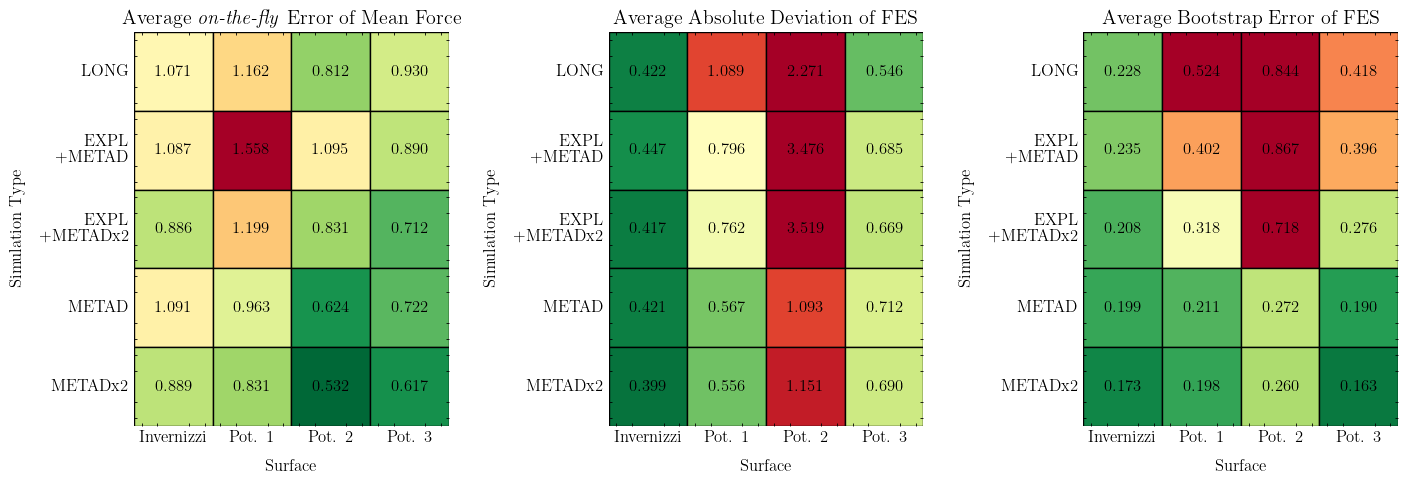

In [27]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

plot_results_grid(aofe_results, fig_size_scaling=1.2, ax=axes[0], title="Average \emph{on-the-fly} Error of Mean Force", #results_min=1.3, results_max=2.5,
                  row_label="Simulation Type", col_label="Surface", row_ticks=["LONG", "EXPL\n+METAD", "EXPL\n+METADx2", "METAD", "METADx2"], col_ticks=["Invernizzi", "Pot. 1", "Pot. 2", "Pot. 3"])

plot_results_grid(aad_results, fig_size_scaling=1.5, ax=axes[1], title="Average Absolute Deviation of FES", results_min=0.38, results_max=1.2,
                  row_label="Simulation Type", col_label="Surface", row_ticks=["LONG", "EXPL\n+METAD", "EXPL\n+METADx2", "METAD", "METADx2"], col_ticks=["Invernizzi", "Pot. 1", "Pot. 2", "Pot. 3"])

plot_results_grid(abs_results, fig_size_scaling=1.5, ax=axes[2], title="Average Bootstrap Error of FES", results_min=0.15, results_max=0.5,
                  row_label="Simulation Type", col_label="Surface", row_ticks=["LONG", "EXPL\n+METAD", "EXPL\n+METADx2", "METAD", "METADx2"], col_ticks=["Invernizzi", "Pot. 1", "Pot. 2", "Pot. 3"])

